# Tarea 2

# Problema 1

Hacer un programa para encontrar todas las raíces de una función en un intervalo cerrado suponiendo que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz

Se vieron en clase 2 métodos para encontrar raíces: bipartición y Newton. Se observó que el método de Newton resultaba inestable cuando se aplicaba a funciones periódicas. Se  usará por lo tanto el método de bipartición para resolver el problema. Notemos que el programa debe entregar como resultado TODAS las raíces. Deberemos por tanto modificar el programa hecho en clase de tal manera que este corra las veces necesarias para obtener todas las raíces.

En primer lugar consideramos la hipótesis de que entre cada oscilación hay al menos una raíz. Deberemos buscar dentro del intervalo en el que deseamos encontrar todas las raíces una serie de puntos que determinen subintervalos donde se realice una oscilación (por ejemplo, en el caso del seno en el intervalo $[0,3 \pi]$ los subintervalos serán de la forma $[\pi/2,3 \pi/2]$ , $[3 \pi/2, 5 \pi/2]$, ...). Estos puntos corresponden a extremos locales. Programamos una función que encuentre los máximos locales de una función:



In [1]:
from pylab import *
from numpy import *
%matplotlib inline
from matplotlib import gridspec

In [37]:
#función para encontrar extremos locales (da al final del array x_der)
def maximo(d_funcion,x_izq,x_der,particion): 
    puntos=[]  #Arreglo donde guardaremos los máximos locales
    x = arange(x_izq,x_der+particion,particion) 
    j=0
    for i in range(len(x)-1):
        if d_funcion(x[i+1])*d_funcion(x[i])<=0:
            puntos = append(puntos,x[i]+particion/2)  
            j+=1 
    puntos =append(puntos, x_der)    
    return  puntos

Programamos ahora los métodos de bipartición y Newton tal y como lo programamos en clase

In [38]:
def raiz_bip(funcion,x_izq,x_der,error=1e-8): 
        raiz = 0.5*(x_izq+x_der)
        y_izq,y_der = funcion(x_izq),funcion(x_der)
        n = 0
        intervalo=[x_izq,x_der]
        while abs(y_der)>=error:
            n += 1
            y_media = funcion(raiz)
            if y_media == 0.:
                break
            if y_media*y_izq < 0:
                x_der = raiz
            else:
                x_izq = raiz
            raiz= 0.5*(x_izq+x_der)
            y_izq,y_der = funcion(x_izq),funcion(x_der)
            if n>=1000:         #Protegemos al proceso en contra de que encontremos maximos entre los que no haya raíces
                break
        if n<100:
            print ("número de pasos:",n ,",raíz:",raiz, "\n") 
        return  raiz

In [4]:
def mi_newton_1(func,d_func,x_ini,err=1e-8):
    n=0
    while abs(func(x_ini)) >= err:
        raiz = x_ini - func(x_ini)/d_func(x_ini)
        x_ini = raiz
        n += 1
    return raiz

Ahora modificamos el programa visto en clase de tal manera que la función tome un intervalo, calcule los máximos locales, defina a partir de ellos subintervalos y aplique el método de bipartición para encontrar en cada subintervalo una raíz

In [43]:
def raiz_bip_osc(funcion,d_funcion,x_izq,x_der,part_max=0.01,error=1e-8):
    extremos = maximo(d_funcion,x_izq,x_der,part_max)
    raiz = []
    for i in range(len(extremos)-1):
        raiz=append(raiz,raiz_bip(funcion,extremos[i],extremos[i+1]))
    return  raiz

Notemos que el programa nos exige información de la función a la que le encontrará los ceros (el número aproximado de extremos en el intervalo)

Ponemos ahora en práctica la función usando la función
$$
y(x)=cosx+ \frac{6}{5}sinx^2
$$

In [6]:
def funcion_prueba(x):
    return cos(x)+(6/5)* sin(x**2)
def d_funcion_prueba(x):
    return -sin(x)+(12/5)*x*cos(x**2)

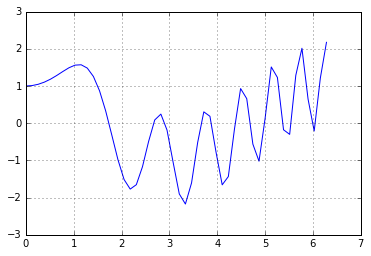

In [7]:
x=linspace(0,2*pi)
plot(x,funcion_prueba(x))
grid(True)
show()

Notamos que la función tiene aproximadamente 14 extremos en el intervalo pedido.

In [51]:
raices1= raiz_bip_osc(funcion_prueba,d_funcion_prueba,0,2*pi,part_max=0.001,error=1e-8)

número de pasos: 29 ,raíz: 1.73377182377 

número de pasos: 27 ,raíz: 2.6680907446 

número de pasos: 28 ,raíz: 2.91173613792 

número de pasos: 28 ,raíz: 3.65748885252 

número de pasos: 26 ,raíz: 3.87851659377 

número de pasos: 27 ,raíz: 4.37378837868 

número de pasos: 27 ,raíz: 4.68723683173 

número de pasos: 29 ,raíz: 4.99020598643 

número de pasos: 27 ,raíz: 5.36717872907 

número de pasos: 28 ,raíz: 5.54540053056 

número de pasos: 27 ,raíz: 5.95538712695 

número de pasos: 27 ,raíz: 6.06215494964 



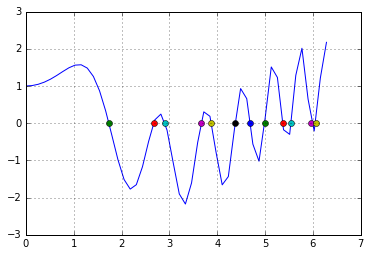

In [52]:
x=linspace(0,2*pi)
plot(x,funcion_prueba(x))
grid(True)
for i in range(len(raices1)-2):   
    plot(raices1[i+1],[0],'o')
show()

# Problema 2

Consideremos la siguiente función:
$$
f(x,y)= 2 e^{-(x+1)^2}(e^{-(y+2)^2}+e^{-(y-2)^2})+6x(x^2+y^2)e^{-(x^2+y^2)}-1
$$

Encontraremos los puntos (x,y) tales que $f(x,y)=0$

In [10]:
def funcion_2(x,y):
    return 2*exp(-(x+1)**2)*(exp(-(y+2)**2)+exp(-(y-2)**2))+6*x*(x**2+y**2)*exp(-(x**2+y**2))-1
def d_funcion_2(x,y):
    return -12*x**2*(x**2 + y**2)*exp(-x**2 - y**2) + 12*x**2*exp(-x**2 - y**2) + 2*(-2*x - 2)*(exp(-(y + 2)**2) + exp(-(y - 2)**2))*exp(-(x + 1)**2) + 6*(x**2 + y**2)*exp(-x**2 - y**2)

Grafiquemos cortes de la función dada:

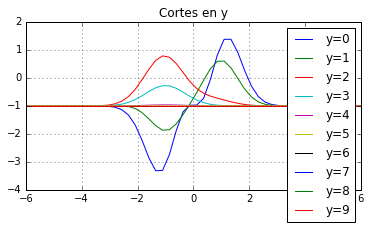

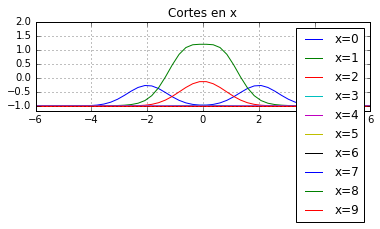

In [11]:
x=linspace(-6,6)
for i in range(10):
    plot(x,funcion_2(x,i),label="y=%s"%i)
    xlim([-6,6]),ylim([-4,2])
    axes().set_aspect('equal'),grid(True)
    plt.title(u'Cortes en y' )
    legend()
show()

for i in range(10):
    plot(x,funcion_2(i,x),label="x=%s"%i)
    xlim([-6,6]),ylim([-1.2,2])
    axes().set_aspect('equal'),grid(True)
    plt.title(u'Cortes en x' )
    legend()


De los cortes podemos ver que la función se hace cero para x y y menores a 3. No se espera que haya más ceros a x (o y) mayores debido a que, observando la función vemos que no hay ningún tipo de comportamiento periódico que permita pensar que una vez que las curvas de nivel ya no cruzan el cero otra curva con mayor x (o y )vuelva a hacerlo. 

Para encontrar los puntos en los que la función se hace cero usaremos nuevamente el método de bipartición que programamos en clase, metiendo a nuestra función con una de las dos variables constante, para obtener una función de una sola variable. Luego de eso el programa aplicará el método de bipartición normalmente.

In [12]:
def new_vec(funcion,d_funcion,indice,a,x_ini,error=1e-8):
    if indice == 1:
        def funcion1var(x):
            return funcion(x,a)
        def d_funcion1var(x):
            return d_funcion(x,a)
    if indice == 2:
        def funcion1var(x):
            return funcion(a,x)
        def d_funcion1var(x):
            return d_funcion(a,x)
    raiz = mi_newton_1(funcion1var,d_funcion1var,x_ini,err=1e-8)
    return raiz

In [54]:
def bip_vec(funcion,d_funcion,indice,a,x_izq,x_der,parx,error=1e-8):
    puntos = zeros(10)
    if indice == 1:
        def funcion1var(x):
            return funcion(x,a)
        def d_funcion1var(x):
            return d_funcion(x,a)
    if indice == 2:
        def funcion1var(x):
            return funcion(a,x)
        def d_funcion1var(x):
            return d_funcion(a,x)
    
    raiz  = raiz_bip_osc(funcion1var,d_funcion1var,x_izq,x_der,parx) 
    return raiz

Ahora usamos esta función para encontrar las raíces de las curvas de corte con y constante y con x variando en el intervalo $[-4,4]$

In [63]:
bip_vec(funcion_2,d_funcion_2,1,0,-4,4,0.01,error=1e-8)

número de pasos: 26 ,raíz: 0.626031147316 

número de pasos: 28 ,raíz: 1.94692862029 



array([-0.055     ,  0.055     ,  0.62603115,  1.94692862])

In [58]:
particiony=0.1
y=arange(-4,4,particiony)
for i in range(len(y)): 
    bip_vec(funcion_2,d_funcion_2,1,y,-4,4,0.01,error=1e-8)
    y+=particiony

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

y=-4.0
y=-3.9
y=-3.8
y=-3.7
y=-3.6
y=-3.5
y=-3.4
y=-3.3
y=-3.2
y=-3.1
y=-3.0
y=-2.9
y=-2.8
y=-2.7
y=-2.6
y=-2.5
y=-2.4
y=-2.3
y=-2.2
y=-2.1
y=-2.0
y=-1.9
y=-1.8
y=-1.7
y=-1.6
y=-1.5
y=-1.4
y=-1.3
y=-1.2
y=-1.1
y=-1.0
y=-0.9
y=-0.8
y=-0.7
y=-0.6
y=-0.5
y=-0.4
y=-0.3
y=-0.2
y=-0.1
y=3.5527136788e-15
y=0.1
y=0.2
y=0.3
y=0.4
y=0.5
y=0.6
y=0.7
y=0.8
y=0.9
y=1.0
y=1.1
y=1.2
y=1.3
y=1.4
y=1.5
y=1.6
y=1.7
y=1.8
y=1.9
y=2.0
y=2.1
y=2.2
y=2.3
y=2.4
y=2.5
y=2.6
y=2.7
y=2.8
y=2.9
y=3.0
y=3.1
y=3.2
y=3.3
y=3.4
y=3.5
y=3.6
y=3.7
y=3.8
y=3.9
y=4.0
